In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = 'D:\Programing\Football-Analysis\output_videos\cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\anind\AppData\Local\Temp\ipykernel_4972\1609083124.py:1: SyntaxWarning: invalid escape sequence '\P'
  image_path = 'D:\Programing\Football-Analysis\output_videos\cropped_image.jpg'


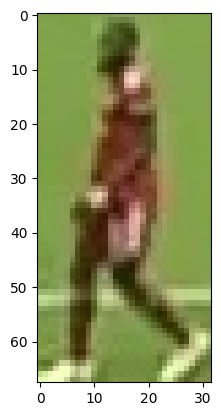

In [3]:
plt.imshow(image)
plt.show()

# take top half of the image:


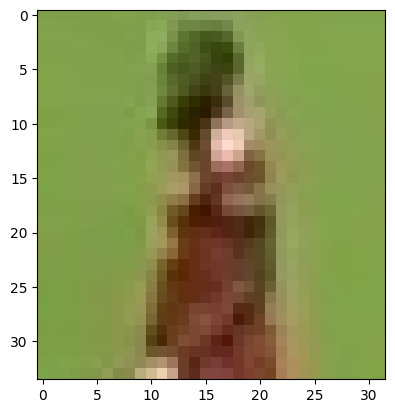

In [4]:
top_half_img = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_img)
plt.show()

# cluster the image into two images:

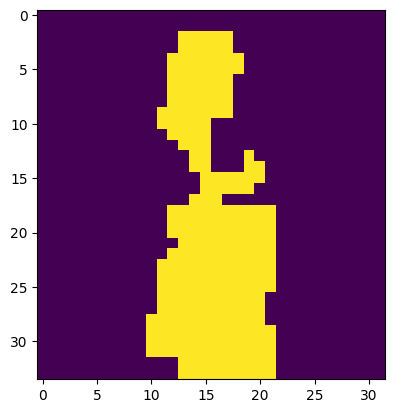

In [5]:
#Reshpae the image into 2d array:
image_2d = top_half_img.reshape(-1, 3)

#perform k-means clustering with 2 clusters:
kmeans = KMeans(n_clusters=2, random_state=42).fit(image_2d)

#get the cluster labels:
labels = kmeans.labels_

# reshape the labels into the origianl image shape:
clustered_image = labels.reshape(top_half_img.shape[0], top_half_img.shape[1])

# Display the clustered image:
plt.imshow(clustered_image)
plt.show()

In [6]:
corner_cluster = [clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)
print(non_player_cluster)

0


In [7]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [8]:
kmeans.cluster_centers_[player_cluster]

array([96.74297189, 66.06827309, 33.46586345])